# Sampling Measure Zero Polyhedra

We start with a HPolyhedron defined by
$$
    Ax \leq b
$$
$$
    Cx = d
$$

## Defining the original polyhedron P

In [ ]:
from large_gcs.geometry.polyhedron import Polyhedron
import numpy as np
import matplotlib.pyplot as plt

P_verts = np.array([[1,1],[3,1]])
P = Polyhedron.from_vertices(P_verts)
P._vertices = P_verts
P.plot()

In [ ]:
P.set.A()

In [ ]:
P.set.b()

In [ ]:
P.has_equality_constraints()

In [ ]:
A,b,C,d = P.get_separated_inequality_equality_constraints()

In [ ]:
A

In [ ]:
b

In [ ]:
C

In [ ]:
d

## Finding the null space of a matrix

In [ ]:
import numpy as np
from scipy.linalg import null_space

# Define your matrix X
X = np.array([
    [1, 2, 3, 5],
    [4, 5, 6, 2],
    [7, 8, 9, 1]
])

# Find the basis for the kernel of X
kernel_basis = null_space(X)

print("Basis for the kernel of X:")
print(kernel_basis)
X @ kernel_basis


### Find the basis of the null space of C

In [ ]:
V = null_space(C)
V

In [ ]:
V.shape

## Find $x_0$ such that $Cx_0 = d$

In [ ]:
# Compute the pseudo-inverse of C
C_pinv = np.linalg.pinv(C)

# Use the pseudo-inverse to find x_0
x_0 = np.dot(C_pinv, d)
x_0

In [ ]:
# Alternatively, solve the system Cx = d in a least squares sense
x_0 = np.linalg.lstsq(C, d, rcond=None)[0]
x_0

In [ ]:
Q = Polyhedron(A = A@V, b = b - A @ x_0)

In [ ]:
q_samples = Q.get_samples(20)
q_samples.shape

In [ ]:
V.shape

In [ ]:
p_samples = q_samples @ V.T + x_0
p_samples

In [ ]:
P.plot()
plt.scatter(p_samples[:,0], p_samples[:,1], c = 'r', marker='x')

Now that we've built in this functionality into the `Polyhedron` class, can simply call `get_samples`

In [ ]:
samples = P.get_samples(20)
len(samples)
samples

# Check that it works for contact sets with equality constraints

In [ ]:
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams


graph_file = ContactGraphGeneratorParams.graph_file_path_from_name("cg_simple_2")
cg = ContactGraph.load_from_file(graph_file)
cg.plot()


In [ ]:
for v in cg.vertex_names:
    cg.plot_samples_in_set(v, 20)

# Challenging Case

In [26]:
import numpy as np
import logging
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams

logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)


INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 21564.54it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 15505.74it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
100%|██████████| 3/3 [00:00<00:00, 53.85it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (151)
100%|██████████| 151/151 [00:00<00:00, 589.30it/s]
DEBUG:large_gcs.geometry.polyhedron:
 A.shape: (50, 14), b.shape: (50,), C.shape: (8, 14), d.shape: (8,)
DEBUG:large_gcs.geometry.polyhedron:ranks: A: 14, C: 8


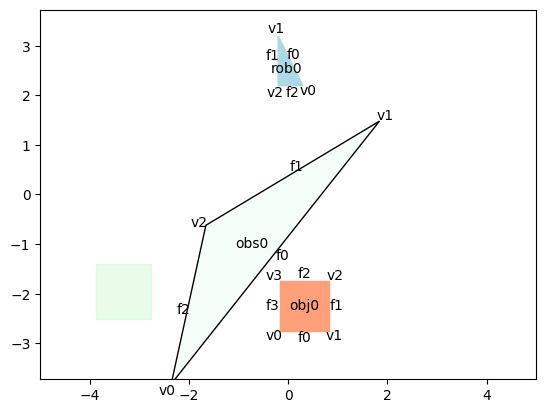

In [30]:


graph_file = ContactGraphGeneratorParams.inc_graph_file_path_from_name("cg_maze_b1")
cg = IncrementalContactGraph.load_from_file(
    graph_file,
    should_incl_simul_mode_switches=False,
    should_add_const_edge_cost=True,
    should_add_gcs=True,
)
cg.plot()


In [2]:
A = np.array([[-0.97690002,0.,0.21369688,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.97690002,0.,-0.21369688,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,-0.97690002,0.,0.21369688,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.97690002,0.,-0.21369688,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[-0.21369688,0.,-0.97690002,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.21369688,0.,0.97690002,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,-0.21369688,0.,-0.97690002,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.21369688,0.,0.97690002,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,-1.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,1.,0.],[0.,0.,0.,0.,0.89442719,0.,0.4472136,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.89442719,0.,0.4472136,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[-1.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[1.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,-1.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,1.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,-1.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,1.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,-1.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,1.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.],[1.,-1.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[-1.,1.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,1.,-1.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,-1.,1.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.97690002,0.,0.,1.],[0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,-0.97690002,0.,0.,-1.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,-0.21369688,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.21369688,0.,0.,0.],[0.,0.,0.,0.,1.,-1.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,-1.,1.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,1.,-1.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,-1.,1.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,-1.,0.,0.,-1.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,1.,0.,0.,1.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,-1.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,1.,0.,0.,0.,0.],[1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.],[-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.,0.],[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,-1.]])
b = np.array([2.08424672e+00,-2.08424672e+00,2.08424672e+00,-2.08424672e+00,3.85545803e+00,-5.79790160e-01,3.85545803e+00,-5.79790160e-01,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-3.96871273e+00,-3.96871273e+00,6.66682241e-01,-6.66682241e-01,6.66682241e-01,-6.66682241e-01,8.33324081e-01,1.16667592e+00,8.33324081e-01,1.16667592e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,-0.00000000e+00,4.50000000e+00,4.50000000e+00,4.50000000e+00,4.50000000e+00,4.50000000e+00,4.50000000e+00,4.50000000e+00,4.50000000e+00,4.66668224e+00,4.33332408e+00,4.83331776e+00,4.66667592e+00,4.66668224e+00,4.33332408e+00,4.83331776e+00,4.66667592e+00,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03,1.00000000e+03])

In [4]:
A.shape, b.shape, np.linalg.matrix_rank(A)

((92, 18), (92,), 18)

In [10]:
P = Polyhedron(A = A, b = b)
P.set.IsBounded(), P.set.IsEmpty(), P._null_space_polyhedron.set.IsBounded(), P._null_space_polyhedron.set.IsEmpty()

DEBUG:large_gcs.geometry.polyhedron:
 A.shape: (66, 18), b.shape: (66,), C.shape: (13, 18), d.shape: (13,)
DEBUG:large_gcs.geometry.polyhedron:ranks: A: 18, C: 13


(True, False, True, False)

In [29]:
sample = P.get_samples(1)

DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set


In [8]:
chebyshev_center = P._null_space_polyhedron.set.ChebyshevCenter()
chebyshev_center

array([ 296.04665013,   51.14647059, 1129.55986115,  584.03970869,
        541.11791717])

In [23]:
E = P._null_space_polyhedron.set.MaximumVolumeInscribedEllipsoid()

RuntimeError: Solver Mosek failed to solve the maximum inscribed ellipse problem; it terminated with SolutionResult SolverSpecificError). Make sure that your polyhedron is bounded and has an interior.

In [12]:
P._null_space_polyhedron.set.PointInSet(chebyshev_center, tol = 1e-6)

True

In [13]:
P._null_space_polyhedron.set.PointInSet(chebyshev_center, tol = 0)

False

In [6]:
P._null_space_polyhedron.get_samples(10)

DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set


ValueError: The Hit and Run algorithm failed to find a feasible point in the set. The `previous_sample` must be in the set.
max(A * previous_sample - b) = 1.8322595171201043e-16

In [ ]:
enlarged = P._null_space_polyhedron.set.Scale(1.01)
enlarged_P_nullspace = Polyhedron(A = enlarged.A(), b = enlarged.b(), should_compute_vertices=False)
enlarged_P_nullspace.get_samples(10)